<a href="https://colab.research.google.com/github/AnujaTheophilus/Newrepo/blob/main/Exitexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [66]:
df = pd.read_csv('/content/Obesity.csv')

In [67]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [68]:
df.shape

(2111, 17)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [70]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [71]:
#checking null values
df.isna().sum()

,0
Gender,9
Age,0
Height,10
Weight,0
family_history_with_overweight,6
FAVC,0
FCVC,0
NCP,0
CAEC,9
SMOKE,0


<Axes: xlabel='Height', ylabel='Count'>

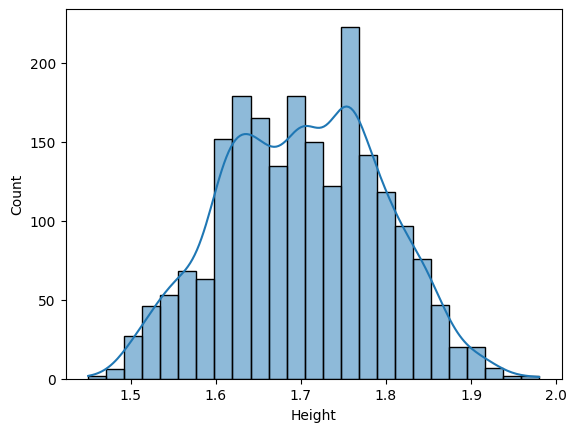

In [72]:
#ploting histogram to find the distrbution
sns.histplot(df['Height'], kde=True)

In [73]:
#numerical column with normal distribution filled with mean()
df['Height'] = df['Height'].fillna(df['Height'].mean())

In [74]:
#categorical columns filled with mode()
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['family_history_with_overweight'] = df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0])
df['CAEC'] = df['CAEC'].fillna(df['CAEC'].mode()[0])
df['SCC'] = df['SCC'].fillna(df['SCC'].mode()[0])
df['MTRANS'] = df['MTRANS'].fillna(df['MTRANS'].mode()[0])

In [75]:
#again checking the null values
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [76]:
#checking the dataset is balanced
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


<Axes: xlabel='Gender', ylabel='count'>

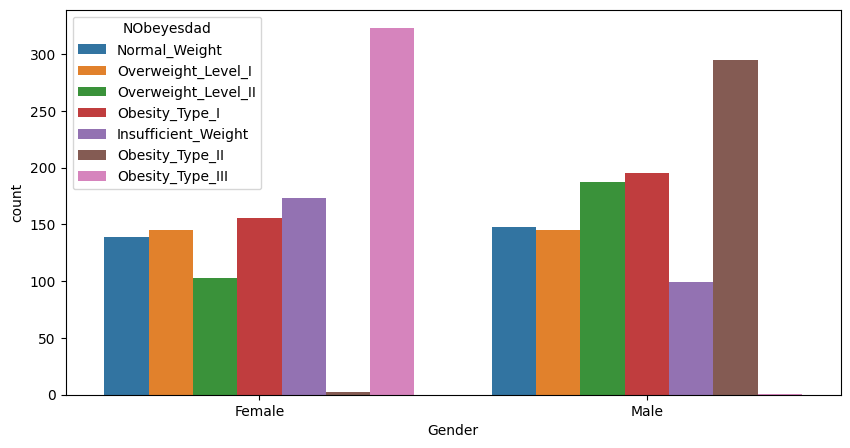

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender', hue='NObeyesdad')

<Axes: xlabel='SMOKE', ylabel='count'>

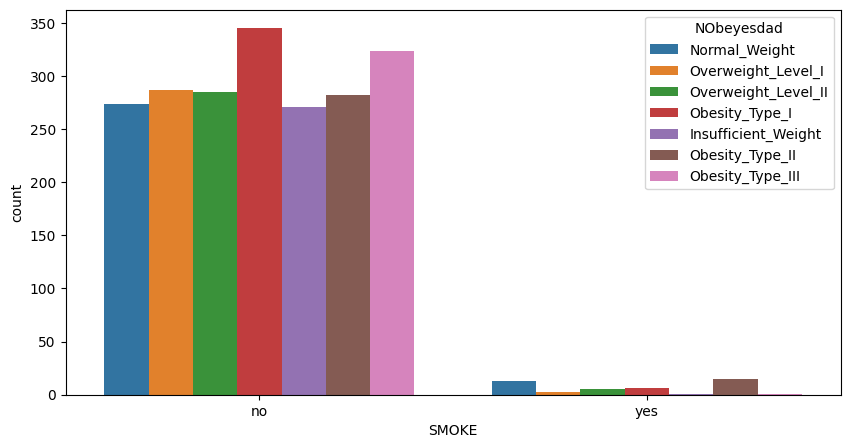

In [78]:
#smoke versus NObeyesdad
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad')

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

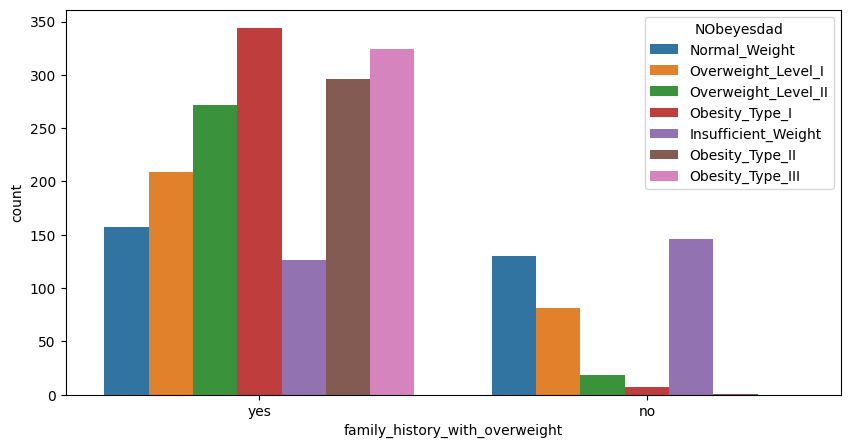

In [79]:
#family_history_with_overweight vs NObeyesdad
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad')

In [80]:
#converting categorical columns into numerical columns
categorical_columns = ['Gender', 'family_history_with_overweight','FAVC', 'CAEC','SMOKE', 'SCC', 'CALC', 'MTRANS','NObeyesdad']
le = LabelEncoder()
for col in categorical_columns:
  df[col] = le.fit_transform(df[col])



In [81]:
#creating correlation matrix
corr = df.corr()
corr

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.032989,0.616895,0.159603,0.106044,0.065622,-0.274224,0.065931,0.090287,0.044423,0.109454,-0.103050,0.191817,0.018335,0.008467,-0.134236,0.022951
Age,0.032989,1.000000,-0.039338,0.155285,0.144507,0.023134,0.024224,-0.053689,0.056092,0.075774,-0.031157,-0.105398,-0.131068,-0.263556,-0.055512,-0.527125,0.197952
Height,0.616895,-0.039338,1.000000,0.459837,0.244199,0.175955,-0.038149,0.244613,0.048289,0.055144,0.213295,-0.133080,0.296582,0.051268,-0.128957,-0.074749,0.035714
Weight,0.159603,0.155285,0.459837,1.000000,0.495331,0.272300,0.216125,0.107469,0.287923,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.003125,0.387643
family_history_with_overweight,0.106044,0.144507,0.244199,0.495331,1.000000,0.209348,0.038524,0.069347,0.173869,0.017062,0.147703,-0.186334,-0.055372,0.022352,0.035469,-0.102742,0.311764
FAVC,0.065622,0.023134,0.175955,0.272300,0.209348,1.000000,-0.027283,-0.007000,0.150393,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.072775,0.044582
FCVC,-0.274224,0.024224,-0.038149,0.216125,0.038524,-0.027283,1.000000,0.042216,-0.054789,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.062684,0.018522
NCP,0.065931,-0.053689,0.244613,0.107469,0.069347,-0.007000,0.042216,1.000000,-0.095407,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.050780,-0.092616
CAEC,0.090287,0.056092,0.048289,0.287923,0.173869,0.150393,-0.054789,-0.095407,1.000000,-0.055402,0.143655,-0.109415,-0.028984,-0.047008,-0.045676,-0.050581,0.328004
SMOKE,0.044423,0.075774,0.055144,0.025746,0.017062,-0.050660,0.014320,0.007811,-0.055402,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010996,-0.023256


<Axes: >

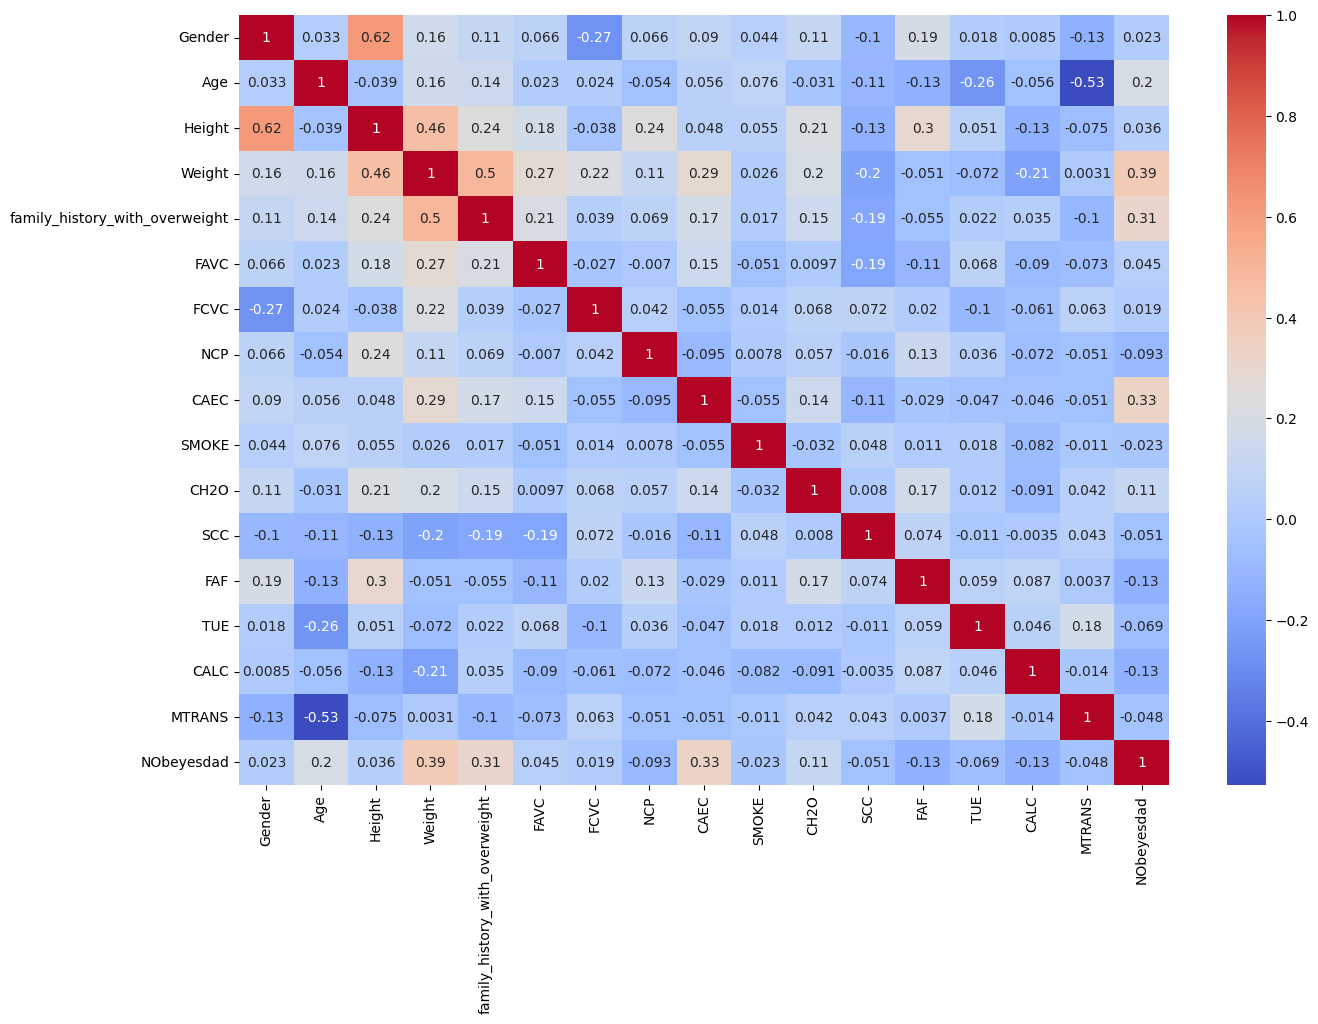

In [82]:
#plotting heatmap to check the correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [83]:
#spliting the features and labels
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [84]:
#selecting the features with high correlation
columns_to_remove = ['FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE','CALC']
X = X.drop(columns_to_remove, axis=1)


In [85]:
X.shape

(2111, 7)

<Axes: >

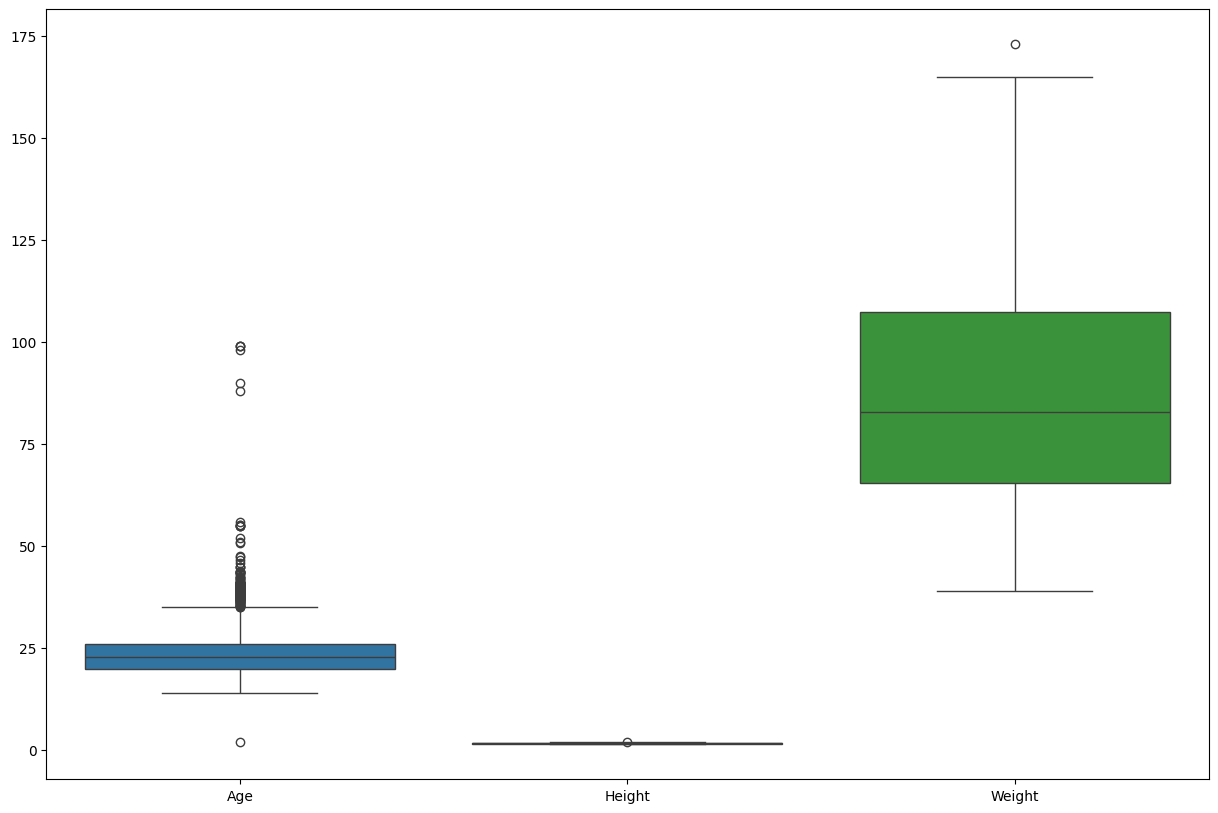

In [86]:
#checking outliers in numerical columns
numerical_columns = ['Age', 'Height', 'Weight']
plt.figure(figsize=(15,10))
sns.boxplot(data=X[numerical_columns])


In [87]:
#handling outliers using clip method
for col in numerical_columns:
  Q1 = X[col].quantile(0.25)
  Q3 = X[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  X[col] = X[col].clip(lower_bound, upper_bound)

<Axes: >

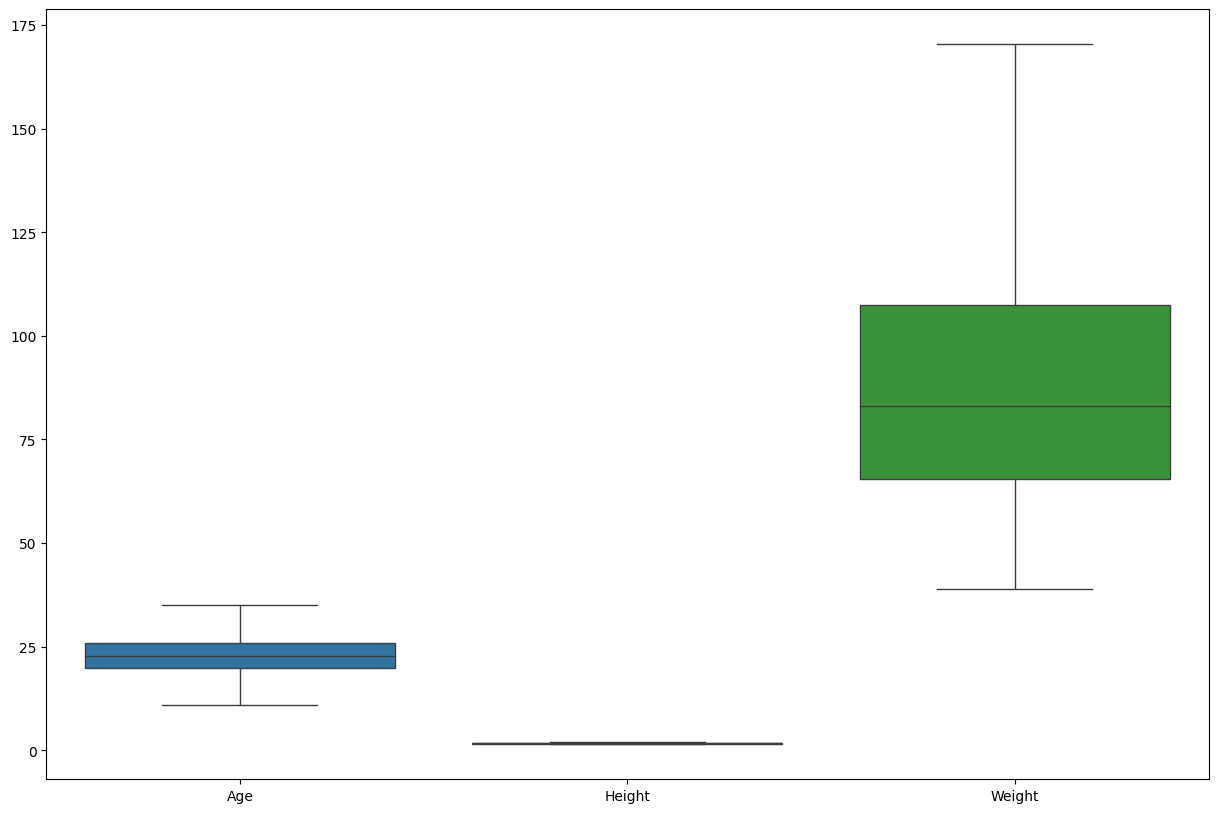

In [88]:
#verifying is there any outliers using boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=X[numerical_columns])


In [89]:
#scaling the numerical columns that are not derived after labelencoding
sc = StandardScaler()
columns_to_scale = ['Age', 'Height', 'Weight']
X[columns_to_scale] = sc.fit_transform(X[columns_to_scale])


In [90]:
#spliting the data for traning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
#model creation using the algorithms knn,svm,decisiontree,randomfoest
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
algorithms = [knn, svm, dt, rf]
for i in algorithms:
  i.fit(X_train, y_train)
  y_pred = i.predict(X_test)
  print(i)
  print(accuracy_score(y_test, y_pred))
  print(' ')

KNeighborsClassifier()
0.8659305993690851
 
SVC()
0.8832807570977917
 
DecisionTreeClassifier()
0.919558359621451
 
RandomForestClassifier()
0.9416403785488959
 


KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        86
           1       0.73      0.69      0.71        93
           2       0.94      0.87      0.90       102
           3       0.93      0.98      0.96        88
           4       1.00      1.00      1.00        98
           5       0.78      0.78      0.78        88
           6       0.82      0.82      0.82        79

    accuracy                           0.87       634
   macro avg       0.86      0.86      0.86       634
weighted avg       0.87      0.87      0.87       634

 
SVC()
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        86
           1       0.84      0.71      0.77        93
           2       0.96      0.94      0.95       102
           3       0.94      0.97      0.96        88
           4       1.00      0.99      0.99        98
           5       0.78      0.70      0.74    

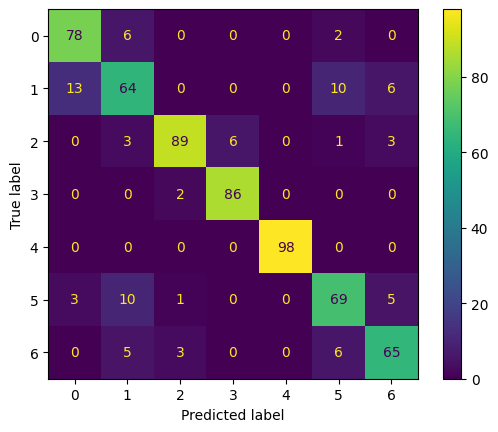

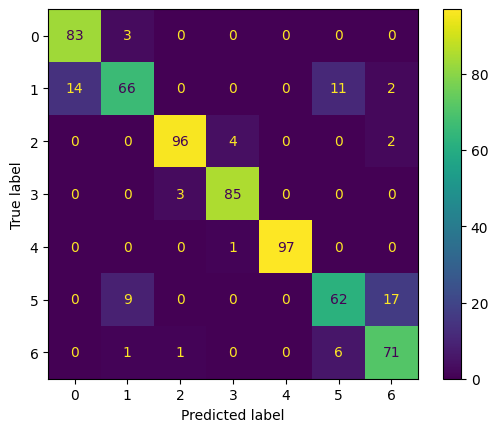

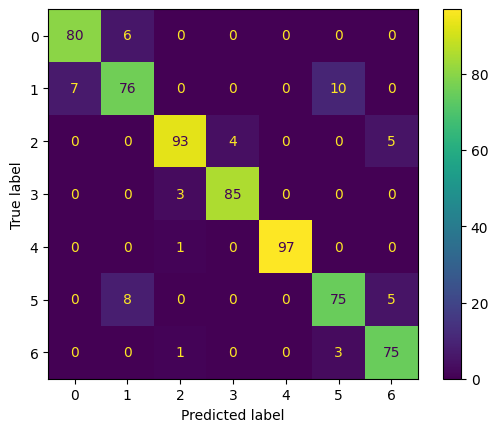

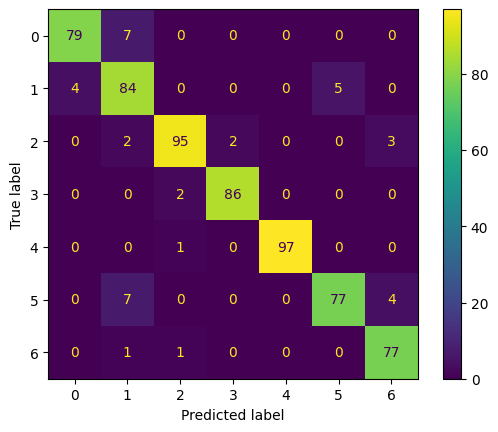

In [92]:
#plotting confusion matrix and classification report for models
for i in algorithms:
  i.fit(X_train, y_train)
  y_pred = i.predict(X_test)
  print(i)
  print(classification_report(y_test, y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
  print(' ')


In [93]:
#cross validating the models

for i in algorithms:
  cv_score = cross_val_score(i, X, y, cv=5)
  print(i)
  print(np.mean(cv_score))
  print(' ')

KNeighborsClassifier()
0.8769128208575621
 
SVC()
0.8911151445889773
 
DecisionTreeClassifier()
0.9417722653580272
 
RandomForestClassifier()
0.9304493966589359
 


In [94]:
#hyperparameter tuning for the model with highest accuracy(random forest classifier) using gridsearchcv
# Define hyperparameters and their possible values

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [96]:
# #applying the parameters obtained after hyperparameter tuning and checking the accuracy
rf = RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9353312302839116
